In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


In [ ]:
!conda install -c conda-forge mdtraj
!conda install -c conda-forge pdbfixer

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
!pip install --pre deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.4/693.4 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 99.3 MB/s eta 0:00:00


In [ ]:
import deepchem as dc
dc.__version__

'2.6.2.dev'

In [ ]:
from deepchem.feat import AtomicConvFeaturizer
f1_num_atoms = 100  # maximum number of atoms to consider in the ligand
f2_num_atoms = 1000  # maximum number of atoms to consider in the protein
max_num_neighbors = 12  # maximum number of spatial neighbors for an atom
neighbor_cutoff = 4 # Maximum distance (angstroms) for two atoms to be considered as neighbors.

acf = AtomicConvFeaturizer(frag1_num_atoms=f1_num_atoms,
                      frag2_num_atoms=f2_num_atoms,
                      complex_num_atoms=f1_num_atoms+f2_num_atoms,
                      max_num_neighbors=max_num_neighbors,
                      neighbor_cutoff=neighbor_cutoff)

In [ ]:
tasks, datasets, transformers = dc.molnet.load_pdbbind(featurizer=acf, reload=False)

/usr/local/lib/python3.7/site-packages/deepchem/feat/base_classes.py:213: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(features)


In [ ]:
train_dataset, valid_dataset, test_dataset = datasets
train_dataset
sample = train_dataset.X[0]


In [ ]:
frag1_coords, frag1_neighbor_list, frag1_z, frag2_coords, frag2_neighbor_list, frag2_z, \
           system_coords, system_neighbor_list, system_z = sample

In [ ]:
frag1_coords # The matrix X containing interatomic distance

array([[-26.862,  86.438, -12.003],
       [-26.045,  85.937, -11.296],
       [-27.997,  86.995, -11.595],
       [-32.018,  89.983, -10.912],
       [-28.298,  86.999, -10.187],
       [-29.49 ,  87.579,  -9.719],
       [-30.397,  88.159, -10.631],
       [-30.107,  88.156, -12.011],
       [-28.921,  87.58 , -12.491],
       [-31.68 ,  88.779, -10.128],
       [-26.334,  86.304, -13.15 ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   

In [ ]:
frag1_neighbor_list # The matrix Z containing neighbors

{0: [1, 2, 4, 5, 7, 8, 10],
 1: [0, 2, 4, 8, 10],
 2: [0, 1, 4, 5, 6, 7, 8, 10],
 3: [5, 6, 7, 9],
 4: [2, 0, 1, 5, 6, 7, 8, 9, 10],
 5: [3, 4, 2, 0, 6, 7, 8, 9],
 6: [3, 5, 4, 2, 7, 8, 9],
 7: [3, 6, 5, 4, 2, 0, 8, 9],
 8: [6, 7, 5, 4, 2, 0, 1, 9, 10],
 9: [3, 6, 7, 5, 8, 4],
 10: [8, 4, 2, 0, 1]}

In [ ]:
frag1_z # The matrix of atomic numbers of each atoms

array([6, 8, 6, 7, 6, 6, 6, 6, 6, 6, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#Training the model

In [ ]:
from deepchem.models import AtomicConvModel
acm = AtomicConvModel(n_tasks=1,
                      frag1_num_atoms=f1_num_atoms,
                      frag2_num_atoms=f2_num_atoms,
                      complex_num_atoms=f1_num_atoms+f2_num_atoms,
                      max_num_neighbors=max_num_neighbors,
                      batch_size=12,
                      layer_sizes=[32, 32, 16],
                      learning_rate=0.003,
                      )

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
x_l = np.load('../input/drive/molecule.csv')


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
y_head = sigmoid(0)
y_head

0.5

In [ ]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]     
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [ ]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
   
    for i in range(number_of_iterarion):
       
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [ ]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
 predict(parameters["weight"],parameters["bias"],x_test)

In [ ]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [ ]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


In [ ]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


In [ ]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [ ]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one 
    # if z is smaller than 0.5, our prediction is sign zero 
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
## Create Model


Cost after iteration 0: 0.335035
Cost after iteration 100: 0.341398
Cost after iteration 200: 0.342808
Cost after iteration 300: 0.330091
Cost after iteration 400: 0.318796
Cost after iteration 500: 0.293973
Cost after iteration 600: 0.260056
Cost after iteration 700: 0.224854
Cost after iteration 800: 0.193199
Cost after iteration 900: 0.167102
Cost after iteration 1000: 0.145568
Cost after iteration 1100: 0.131181
Cost after iteration 1200: 0.115718
Cost after iteration 1300: 0.103623
Cost after iteration 1400: 0.093212
Cost after iteration 1500: 0.084084
Cost after iteration 1600: 0.076276
Cost after iteration 1700: 0.069709
Cost after iteration 1800: 0.064087
Cost after iteration 1900: 0.059070
Cost after iteration 2000: 0.054392
Cost after iteration 2100: 0.050004
Cost after iteration 2200: 0.046068
Cost after iteration 2300: 0.042514
Cost after iteration 2400: 0.039062


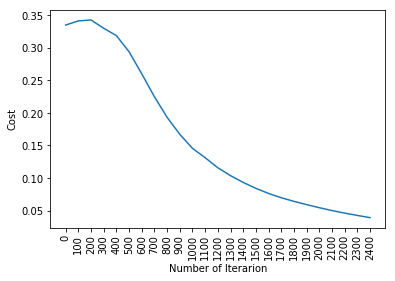

train accuracy: 99.71264367816092 %
test accuracy: 96.7741935483871 %


In [ ]:
# AI- neural network
def two_layer_neural_network(res1, res2, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize 
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation_NN(x_train,parameters)
      
        cost = compute_cost_NN(A2, y_train, parameters)
        
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [ ]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [ ]:
# Evaluating the AI-DNN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6932 - acc: 0.5776
Epoch 2/100
232/232 [==============================] - 0s 100us/step - loss: 0.6927 - acc: 0.6336
Epoch 3/100
232/232 [==============================] - 0s 99us/step - loss: 0.6923 - acc: 0.5517
Epoch 4/100
232/232 [==============================] - 0s 123us/step - loss: 0.6920 - acc: 0.7069
Epoch 5/100
232/232 [==============================] - 0s 103us/step - loss: 0.6905 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 98us/step - loss: 0.6890 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 97us/step - loss: 0.6861 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 97us/step - loss: 0.6814 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 102us/step - loss: 0.6767 - acc: 0.6034
Epoc

In [ ]:
ann_prediction = ann.predict(X_test)
ann_prediction = (ann_prediction > 0.5) 
score = metrics.accuracy_score(Y_test, ann_prediction)
display_cm(Y_test, ann_prediction, score=score)

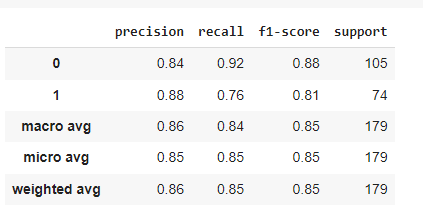

#Predictions

In [ ]:
predictions, raw_outputs = model.predict(test_df["SMILES"].tolist())

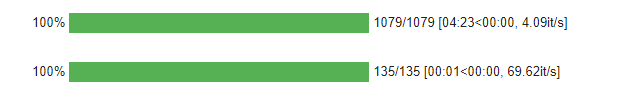

In [ ]:
from tqdm.notebook import tqdm  #used for creating Progress Meters
final_preds=[]
for i,row in tqdm(test_df.iterrows(),total=len(test_df)):
    #predictions, raw_outputs = model.predict([row["SMILES"]])
    order = np.argsort(raw_outputs[i])[::-1][:15]
    labelled_preds = [vocab[i] for i in order]
    for x in labelled_preds:
      assert x in vocab
    sents = []
    for sent in range(0,15,3):
      sents.append(",".join([x for x in labelled_preds[sent:sent+3]]))
    pred = ";".join([x for x in sents])
    final_preds.append(pred)
print(len(final_preds),len(test_df))

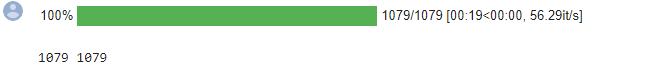

In [ ]:
final = pd.DataFrame({"SMILES":test_df.SMILES.tolist(),"PREDICTIONS":final_preds})
final.head()

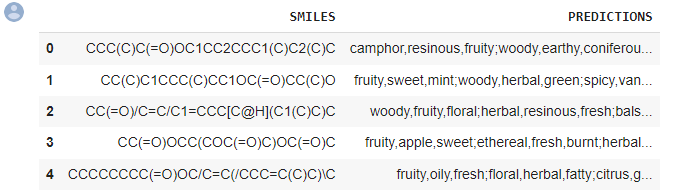

In [ ]:
final.tail()

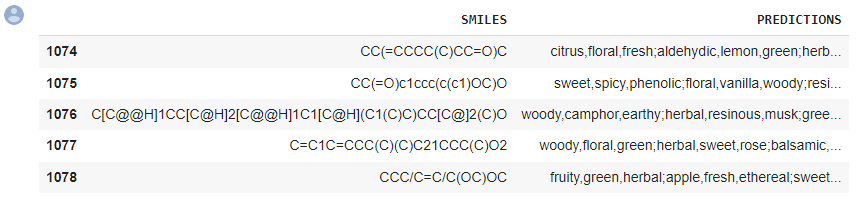

In [ ]:
gt = []
for i in range(y_test.shape[0]):
    smell_ids = np.where(y_test[i]==1)
    smells = [vocab[k] for k in smell_ids[0]]
    gt.append(",".join([x for x in smells[:min(len(smells),3)]])) 
val_dict = {"top_5_sents":top_5_predictions,"target":gt}
df_to_eval = pd.DataFrame(val_dict)
top_5_scr = []
for pred,y in zip(df_to_eval.top_5_sents.tolist(),df_to_eval.target.tolist()):
  top_5_scr.append(in_top_5(pred,y))
df_to_eval["top_5_score"] = top_5_scr
print("OVERALL SCORE:",np.mean(df_to_eval.top_5_score.tolist()))
display(df_to_eval.head())

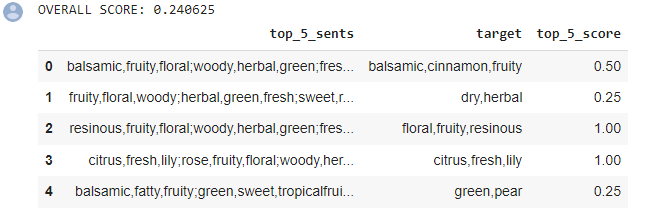

In [ ]:
#test data set predictions

In [ ]:
mols = [Chem.MolFromSmiles(smile) for smile in test_df["SMILES"].tolist()]
feat = dc.feat.CircularFingerprint(size=1024)
test_arr = feat.featurize(mols)
predictions=classifier.predict(test_arr)
top_5_predictions = get_submission(predictions.toarray())
final = pd.DataFrame({"SMILES":test_df.SMILES.tolist(),"PREDICTIONS":top_5_predictions})
final.head()

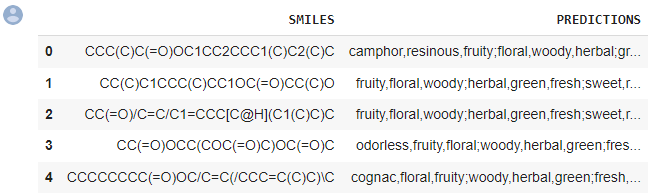

In [ ]:
#frequently ocurring multilabel classes based on coordinate prediction

y_true = val_dataset.y
y_pred = best_model.predict(val_dataset)
# print(y_true.shape,y_pred.shape)
for i in range(y_true.shape[0]):
  final_pred = []
  for y in range(109):
      prediction = y_pred[i,y]
      if prediction[1]>0.1:
        final_pred.append(1)
      else:
        final_pred.append(0)
  smell_ids = np.where(np.array(final_pred)==1)
  smells = [vocab[k] for k in smell_ids[0]]
  
  gt_smell_ids = np.where(np.array(y_true[i])==1)
  gt_smells = [vocab[k] for k in gt_smell_ids[0]]
  print(smells,gt_smells)
    

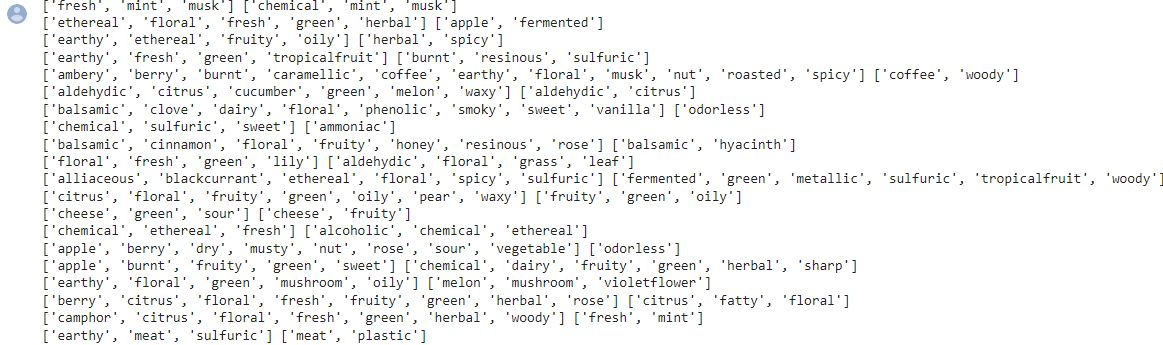